In [9]:
from astropy import units as u
from astropy.analytic_functions import blackbody_lambda, blackbody_nu

import numpy as np
from astropy import units as u
from astropy.analytic_functions import blackbody_lambda, blackbody_nu

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
blackbody_lambda(6000 * u.AA, 10000 * u.K)
blackbody_nu(6000 * u.AA, 10000 * u.K)

<Quantity 0.00018391673686797075 erg / (cm2 Hz s sr)>

In [5]:
wavelengths = [100, 10000] * u.AA
temperature = 5000 * u.K
with np.errstate(all='ignore'):
     flux_lam = blackbody_lambda(wavelengths, temperature)
     flux_nu = blackbody_nu(wavelengths, temperature)
flux_lam
flux_nu

<Quantity [  4.25135927e-123,  2.36894060e-005] erg / (cm2 Hz s sr)>

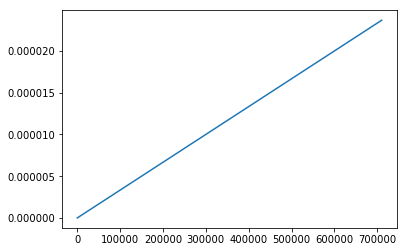

In [11]:
plt.plot(flux_lam, flux_nu)


/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


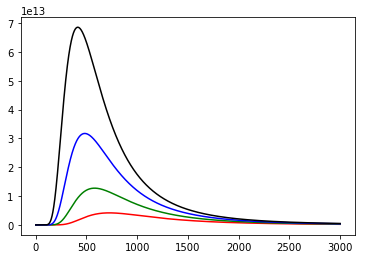

In [13]:
# From: https://stackoverflow.com/questions/22417484/plancks-formula-for-blackbody-spectrum
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 3e-6, 1e-9) 

# intensity at 4000K, 5000K, 6000K, 7000K
intensity4000 = planck(wavelengths, 4000.)
intensity5000 = planck(wavelengths, 5000.)
intensity6000 = planck(wavelengths, 6000.)
intensity7000 = planck(wavelengths, 7000.)

plt.hold(True) # doesn't erase plots on subsequent calls of plt.plot()
plt.plot(wavelengths*1e9, intensity4000, 'r-') 
# plot intensity4000 versus wavelength in nm as a red line
plt.plot(wavelengths*1e9, intensity5000, 'g-') # 5000K green line
plt.plot(wavelengths*1e9, intensity6000, 'b-') # 6000K blue line
plt.plot(wavelengths*1e9, intensity7000, 'k-') # 7000K black line

# show the plot
plt.show()